author: Ollie Jackson

description: assessing EBL density within voids by looking at TVE/VHE-detected 4LAC sources

In [155]:
from astropy.io import ascii
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import sys
import re
from astropy.table import QTable
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo # Used to calculate comoving dist
import math
import descartes
from astropy.coordinates import SkyCoord
#import astropy.units as u

In [414]:
fourlac_sutter = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')

#adding TeV flag to source from looking at updated VHE detected sources 
fourlac_sutter.loc[fourlac_sutter['Source_Name'] == '4FGL J1136.8+2550', 'TeVflag'] = 1
fourlac_sutter.to_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')
fourlac_sutter_TeV = fourlac_sutter[fourlac_sutter.TeVflag == 1]

In [461]:
fourlac_sutter_TeV

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,FluxInc95,FluxInc30,FluxInc40,FluxInc45,Average Void Size,Max Void Size,L1000,Unc_L1000,Energy_L100,Unc_Energy_L100
30,30,30,30,30,30,30,30,35,1262,1262,...,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11,72.941176,105.035868,4.555180e+46,4.641758e+45,6.001493e+40,6.256875e+39
35,35,35,35,35,35,35,35,40,1280,1280,...,2.377549e-11,7.456793e-11,5.612236e-11,4.994501e-11,22.642755,66.269727,1.649993e+48,3.422726e+46,1.700307e+42,3.780621e+40
83,83,83,83,83,83,83,83,90,1470,1470,...,3.239856e-11,1.017218e-10,7.652945e-11,6.809702e-11,32.241750,74.045911,1.095855e+48,1.650131e+46,1.149783e+42,2.279795e+40
97,97,97,97,97,97,97,97,104,1514,1514,...,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12,50.915033,139.253945,4.500827e+47,2.158247e+46,5.358135e+41,3.172035e+40
115,115,115,115,115,115,115,115,122,1590,1590,...,8.159949e-13,2.574352e-12,1.933397e-12,1.719357e-12,53.147776,114.304161,4.219071e+47,3.411722e+46,4.932312e+41,3.648970e+40
139,139,139,139,139,139,139,139,150,1702,1702,...,6.008644e-13,1.891633e-12,1.421756e-12,1.264684e-12,35.856528,80.157819,1.504350e+46,2.110117e+45,1.701547e+40,2.366831e+39
162,162,162,162,162,162,162,162,176,1826,1826,...,3.332600e-11,1.047612e-10,7.878124e-11,7.009031e-11,25.459110,56.657102,4.469197e+47,6.983029e+45,4.481754e+41,8.984221e+39
164,164,164,164,164,164,164,164,178,1839,1839,...,9.013914e-12,2.839472e-11,2.133683e-11,1.897819e-11,34.879005,108.206600,3.627659e+47,1.025660e+46,4.636183e+41,1.504032e+40
165,165,165,165,165,165,165,165,179,1840,1840,...,1.658230e-11,5.193002e-11,3.910550e-11,3.480751e-11,22.759445,36.284075,8.683667e+46,2.346389e+45,9.092916e+40,2.844588e+39
168,168,168,168,168,168,168,168,182,1853,1853,...,3.420652e-12,1.076303e-11,8.091115e-12,7.197702e-12,38.111386,144.045911,1.666866e+47,8.535034e+45,1.619520e+41,1.105036e+40


Notes from checking VHE-detected sources and whether they need to be included or flag updated

### RXJ1136.8+2551 174.267 25.893 0.16 C 7.3±3.1 1.62±0.44 0.49 Yes # [C] in 4LAC, not flagged, in footprint (ADD FLAG)

### RXJ1100.3+4019 165.165 40.315 0.23 C 11.2±3.8 2.23±0.45 0.60 Yes # [C] in 4LAC but without redshift, not flagged, not in footprint bc no redshift (ADD/DONT FLAG)

https://tevcat.org/?mode=1&showsrc=387 # already flagged

https://tevcat.org/?mode=1&showsrc=385 #already flagged

https://tevcat.org/?mode=1&showsrc=354 #not in catalog

https://tevcat.org/?mode=1&showsrc=332 #already flagged

https://tevcat.org/?mode=1&showsrc=334 #not in catalog

https://tevcat.org/?mode=1&showsrc=339 #not in catalog

In [177]:
#NOT NECESSARY - from checking if sources in 4LAC catalog correspond to new VHE-detected sources

coord = SkyCoord(ra=215.637100 * u.degree, dec=32.384998 * u.degree, frame='icrs')

# Print in hh:mm:ss / dd:mm:ss format
print("RA:", coord.ra.to_string(unit=u.hour, sep='hms', precision=2))
print("Dec:", coord.dec.to_string(unit=u.deg, sep='dms', precision=2, alwayssign=True))

RA: 14h22m32.90s
Dec: +32d23m05.99s


In [183]:
#NOT NECESSARY - from checking if sources in 4LAC catalog correspond to new VHE-detected sources
source = SkyCoord('09h04m53.1790s', '-57d35m05.783s', frame='icrs')

# RA and Dec in degrees
print(f"RA: {source.ra.deg:.6f}, Dec: {source.dec.deg:.6f}")

RA: 136.221579, Dec: -57.584940


In [462]:
#adding source luminosity and uncertainty on luminosity for TeV sources from flux
# L = flux * 4pi R^2

#4LAC flux given in cm^2, converting to meters, also converts Mpc to meters
#using luminosity distance R = cmvd_mpc(1+z)

fourlac_sutter_TeV['L1000'] = fourlac_sutter_TeV.Flux1000*100**2 * 4 * np.pi * (fourlac_sutter_TeV['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_sutter_TeV.z)**2
fourlac_sutter_TeV['Unc_L1000'] = 100**2 * 4 * np.pi * (fourlac_sutter_TeV['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_sutter_TeV.z)**2 * fourlac_sutter_TeV.Unc_Flux1000



/var/folders/wv/6tdxcfpj1pd24k5qg8k113pc0000gn/T/ipykernel_12689/2858368205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourlac_sutter_TeV['L1000'] = fourlac_sutter_TeV.Flux1000*100**2 * 4 * np.pi * (fourlac_sutter_TeV['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_sutter_TeV.z)**2
/var/folders/wv/6tdxcfpj1pd24k5qg8k113pc0000gn/T/ipykernel_12689/2858368205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fourlac_sutter_TeV['Unc_L1000'] = 100**2 * 4 * np.pi * (fourlac_sutter_TeV['cmvd_Mpc']*3.085

In [463]:
fourlac_sutter_TeV[['Source_Name', 'CLASS', 'Voidiness','z', 'PL_Index','Unc_PL_Index', 'L1000', 'Unc_L1000', 'Variability_Index']].sort_values(by='Voidiness', ascending=True)


,Source_Name,CLASS,Voidiness,z,PL_Index,Unc_PL_Index,L1000,Unc_L1000,Variability_Index
245,4FGL J1428.5+4240,b'bll',0.005561,0.129000,1.650267,0.040060,2.666680e+46,1.724378e+45,18.563412
30,4FGL J0847.2+1134,b'bll',0.074330,0.199000,1.727812,0.063979,4.555180e+46,4.641758e+45,20.811287
35,4FGL J0854.8+2006,b'BLL',0.190570,0.306000,2.209501,0.013032,1.649993e+48,3.422726e+46,920.420654
239,4FGL J1422.5+3223,b'fsrq',0.231487,0.681889,2.207268,0.011889,1.033870e+49,2.025092e+47,9817.706055
83,4FGL J1015.0+4926,b'bll',0.302815,0.212000,1.838373,0.008840,1.095855e+48,1.650131e+46,338.851562
115,4FGL J1058.6+2817,b'bll',0.329541,0.479300,2.241817,0.060835,4.219071e+47,3.411722e+46,48.246151
169,4FGL J1224.9+2122,b'FSRQ',0.349718,0.434000,2.336098,0.006676,9.921170e+48,1.175452e+47,25039.390625
250,4FGL J1442.7+1200,b'bll',0.363957,0.163000,1.746907,0.053318,3.878753e+46,3.399319e+45,21.065659
97,4FGL J1031.3+5053,b'bll',0.369161,0.361000,1.742608,0.030155,4.500827e+47,2.158247e+46,15.373238
283,4FGL J1555.7+1111,b'BLL',0.375328,0.433000,1.681433,0.007202,1.037668e+49,1.674199e+47,168.596115


In [420]:
fourlac_sutter_TeV.to_excel('exported_dataFrames/4lacsutter_TeV.xlsx')

In [421]:
sum(fourlac_sutter_TeV.z < 0.4)

12

In [422]:
sum(fourlac_sutter_TeV.z >= 0.4)

5

In [601]:
fourlac_sutter_TeV

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,FluxInc95,FluxInc30,FluxInc40,FluxInc45,Average Void Size,Max Void Size,L1000,Unc_L1000,Energy_L100,Unc_Energy_L100
30,30,30,30,30,30,30,30,35,1262,1262,...,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11,72.941176,105.035868,4.555180e+46,4.641758e+45,6.001493e+40,6.256875e+39
35,35,35,35,35,35,35,35,40,1280,1280,...,2.377549e-11,7.456793e-11,5.612236e-11,4.994501e-11,22.642755,66.269727,1.649993e+48,3.422726e+46,1.700307e+42,3.780621e+40
83,83,83,83,83,83,83,83,90,1470,1470,...,3.239856e-11,1.017218e-10,7.652945e-11,6.809702e-11,32.241750,74.045911,1.095855e+48,1.650131e+46,1.149783e+42,2.279795e+40
97,97,97,97,97,97,97,97,104,1514,1514,...,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12,50.915033,139.253945,4.500827e+47,2.158247e+46,5.358135e+41,3.172035e+40
115,115,115,115,115,115,115,115,122,1590,1590,...,8.159949e-13,2.574352e-12,1.933397e-12,1.719357e-12,53.147776,114.304161,4.219071e+47,3.411722e+46,4.932312e+41,3.648970e+40
139,139,139,139,139,139,139,139,150,1702,1702,...,6.008644e-13,1.891633e-12,1.421756e-12,1.264684e-12,35.856528,80.157819,1.504350e+46,2.110117e+45,1.701547e+40,2.366831e+39
162,162,162,162,162,162,162,162,176,1826,1826,...,3.332600e-11,1.047612e-10,7.878124e-11,7.009031e-11,25.459110,56.657102,4.469197e+47,6.983029e+45,4.481754e+41,8.984221e+39
164,164,164,164,164,164,164,164,178,1839,1839,...,9.013914e-12,2.839472e-11,2.133683e-11,1.897819e-11,34.879005,108.206600,3.627659e+47,1.025660e+46,4.636183e+41,1.504032e+40
165,165,165,165,165,165,165,165,179,1840,1840,...,1.658230e-11,5.193002e-11,3.910550e-11,3.480751e-11,22.759445,36.284075,8.683667e+46,2.346389e+45,9.092916e+40,2.844588e+39
168,168,168,168,168,168,168,168,182,1853,1853,...,3.420652e-12,1.076303e-11,8.091115e-12,7.197702e-12,38.111386,144.045911,1.666866e+47,8.535034e+45,1.619520e+41,1.105036e+40


results from KS test comparing voidiness to redshift matched SDSS populations

## 0.1 - 0.4 (11 sources)

KS: 0.2342

median P-value: 0.47695095951287325

Significance (one-tail): 0.05780755650559004 Sigma

## 0.4 - 0.7 (5 sources)

KS: 0.3435

median P-value: 0.49583971311552283

Significance (one-tail): 0.010428481753972254 Sigma

## 0.1-0.7 (16 sources)

KS: 0.2276

median P-value: 0.3115335939709687

Significance (one-tail): 0.49150801038128383 Sigma

## Plots

In [423]:
from scipy import stats

In [424]:
cmap = plt.get_cmap("tab10")

params = {#'backend': 'ps',
      'axes.labelsize': 15,
      'xtick.labelsize': 15,
      'ytick.labelsize': 15,
      'legend.fontsize': 15}
plt.rcParams.update(params)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [425]:
from matplotlib.patches import Polygon

def fix_hist_step_vertical_line_at_end(ax):
    axpolygons = [poly for poly in ax.get_children() if isinstance(poly, Polygon)]
    for poly in axpolygons:
        poly.set_xy(poly.get_xy()[:-1])

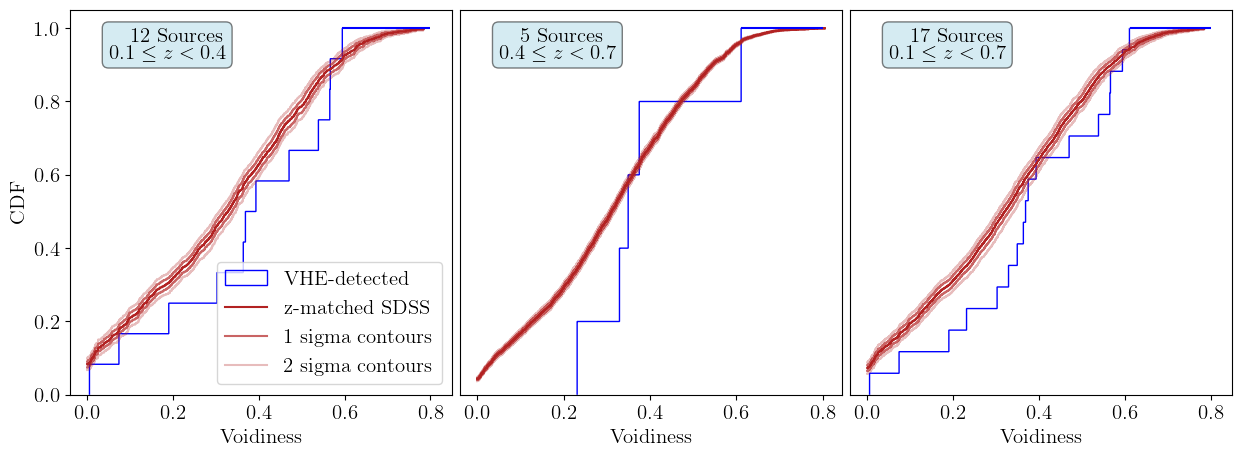

In [470]:

plt.figure(figsize = (15,5))

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-04_z-matched_TeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_TeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,1)

nbins = 2000
#plt.figure("4LAC TeV SDSS z-matched CDF (11 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])


ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="VHE-detected")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7,  ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="lower right")
plt.text(0.05, 1, r'12 Sources \\ $0.1 \leq z < 0.4$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5)) 

#plt.title(r"$0.1 \leq z < 0.4$")

# ------------------------------------------

#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_04-07_z-matched_TeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_TeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,2)

nbins = 2000
#plt.figure("4LAC TeV vs SDSS z-matched CDF (5 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.05, 1, r'5 Sources \\$0.4 \leq z < 0.7$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.4 \leq z < 0.7$")

#--------------------------------------------------------------------------------------------


#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-07_z-matched_TeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_TeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

plt.subplot(1,3,3)

nbins = 2000
#plt.figure("4LAC TeV vs SDSS z-matched CDF (5 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')
plt.xlabel(r'Voidiness')
plt.yticks([])
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.05, 1, r'17 Sources \\ $0.1 \leq z < 0.7$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))
#plt.title(r"$0.1 \leq z < 0.7$")
plt.subplots_adjust(wspace=0.02, hspace=0.02)


plt.savefig('sutter_TeV_cdfs.png', dpi = 300, bbox_inches = 'tight')

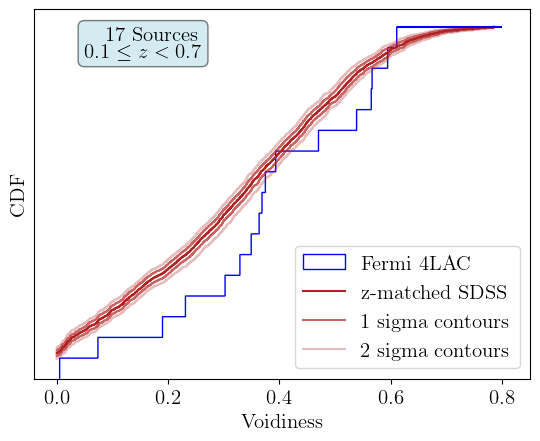

In [599]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSsutter_01-07_z-matched_TeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacsutter_TeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.7:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)

nbins = 2000
#plt.figure("4LAC TeV vs SDSS z-matched CDF (5 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])

ax = plt.gca()
ax.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color='b',label="Fermi 4LAC")
fix_hist_step_vertical_line_at_end(ax)

all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="firebrick", ds="steps-mid", label="z-matched SDSS")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="firebrick", alpha = 0.7, ds="steps-mid",label="1 sigma contours")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="firebrick", alpha = 0.7, ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="firebrick", alpha = 0.3, ds="steps-mid",label="2 sigma contours")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="firebrick", alpha = 0.3, ds="steps-mid")
plt.hlines(y = 1, xmin = max(Voidiness), xmax = 0.8, color = 'b')

plt.xlabel(r'Voidiness')
plt.yticks([])
plt.ylabel('CDF')
#plt.ylabel(r'CDF')
#plt.legend(loc="lower right")
plt.text(0.05, 1, r'17 Sources \\ $0.1 \leq z < 0.7$',
        fontsize=15,
        ha='left',
        va='top',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='lightblue',
                  edgecolor='black',
                  alpha=0.5))

plt.legend()
#plt.title(r"$0.1 \leq z < 0.7$")
#plt.subplots_adjust(wspace=0.02, hspace=0.02)
plt.savefig('sutter_TeV_cdf.png', dpi = 300, bbox_inches = 'tight')

In [429]:
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import pearsonr

def line(x, a,b):
    return a*x + b


In [430]:
fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45,L1000,Unc_L1000
30,30,30,30,30,35,1262,1262,4FGL J0847.2+1134,1,131.811905,...,1.039083e-11,8.940321e-12,7.845174e-12,6.989048e-12,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11,4.555180e+42,4.641758e+41
97,97,97,97,97,104,1514,1514,4FGL J1031.3+5053,1,157.845398,...,3.102474e-12,2.660457e-12,2.328683e-12,2.070483e-12,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12,4.500827e+43,2.158247e+42
139,139,139,139,139,150,1702,1702,4FGL J1136.8+2550,1,174.217102,...,9.498674e-13,8.146706e-13,7.131642e-13,6.341503e-13,6.008644e-13,1.891633e-12,1.421756e-12,1.264684e-12,1.504350e+42,2.110117e+41
235,235,235,235,235,253,2153,2153,4FGL J1417.9+2543,1,214.494003,...,6.800376e-13,5.831540e-13,5.104335e-13,4.538388e-13,4.300006e-13,1.355770e-12,1.018439e-12,9.057581e-13,3.692927e+42,5.775009e+41
245,245,245,245,245,263,2192,2192,4FGL J1428.5+4240,1,217.128601,...,2.119291e-10,1.913890e-10,1.744786e-10,1.603139e-10,1.540604e-10,3.125626e-10,2.698502e-10,2.525916e-10,2.666680e+42,1.724378e+41
250,250,250,250,250,268,2232,2232,4FGL J1442.7+1200,1,220.697998,...,3.475690e-12,2.982015e-12,2.611138e-12,2.322309e-12,2.200600e-12,6.905153e-12,5.196142e-12,4.623935e-12,3.878753e+42,3.399319e+41


# Correlation Plots/Values for different populations

Compares voidiness v. Luminosity, PL Index, and Variability Index for the following populations
1. All 4LAC sources
2. Non-variable 4LAC sources
3. TeV sources only
4. Non-variable TeV sources

## All 4lac sources

In [473]:
fourlac_sutter['L1000'] = 100**2 * fourlac_sutter.Flux1000 * 4 * np.pi * (fourlac_sutter['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_sutter.z)**2
fourlac_sutter['Unc_L1000'] = 100**2 * 4 * np.pi * (fourlac_sutter['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_sutter.z)**2 * fourlac_sutter.Unc_Flux1000


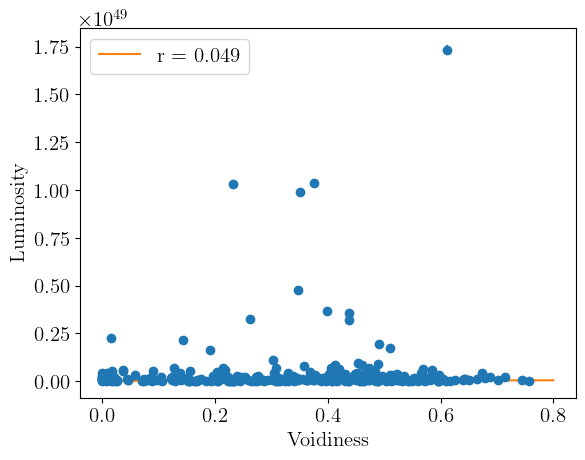

In [552]:
popt, pcov = curve_fit(line, fourlac_sutter.Voidiness, (fourlac_sutter.L1000)/1e45, sigma = (fourlac_sutter.Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter.Voidiness, fourlac_sutter.L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_sutter.Voidiness, fourlac_sutter.L1000, yerr = fourlac_sutter.Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.legend()

Pearson r = 0.001 ± 0.057


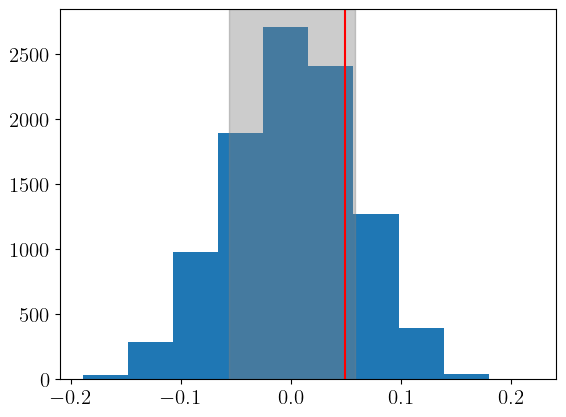

In [555]:
import numpy as np
from scipy.stats import pearsonr

#monto carlo to see if the pearson coefficient is consistent with random correlation for the populations

# Example data
x = fourlac_sutter.Voidiness
y = fourlac_sutter.L1000
sigma_y = fourlac_sutter.Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: 
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True) # keeping the same luminosity values, shuffling the associated voidiness
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.049, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

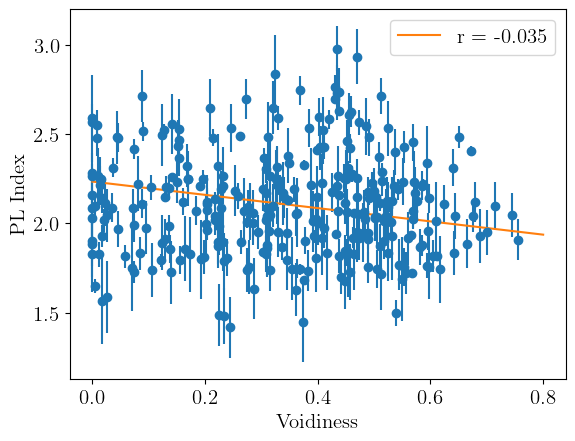

In [556]:
popt, pcov = curve_fit(line, fourlac_sutter.Voidiness, fourlac_sutter.PL_Index, sigma = fourlac_sutter.Unc_PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter.Voidiness, fourlac_sutter.PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_sutter.Voidiness, fourlac_sutter.PL_Index, yerr = fourlac_sutter.Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

Pearson r = 0.000 ± 0.058


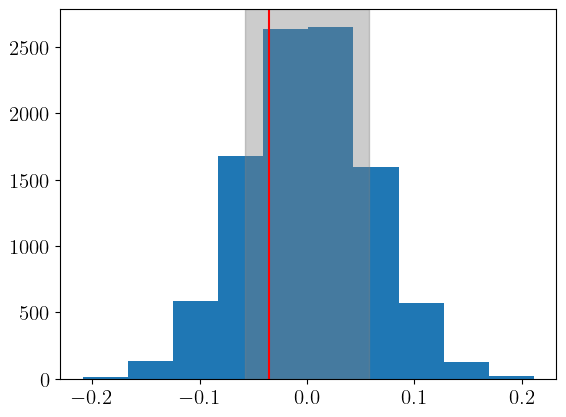

In [557]:
# Example data
x = fourlac_sutter.Voidiness
y = fourlac_sutter.PL_Index
sigma_y = fourlac_sutter.Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.035, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

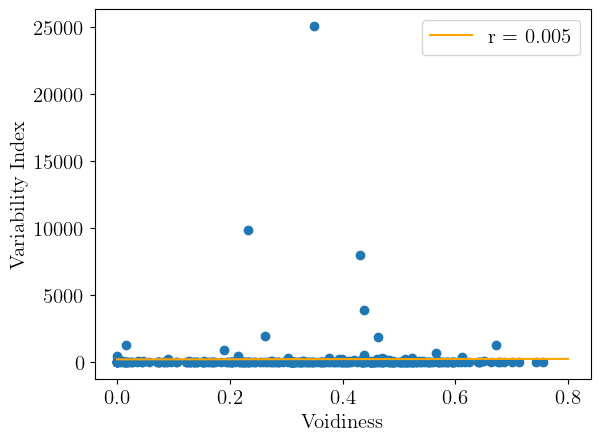

In [558]:
popt, pcov = curve_fit(line, fourlac_sutter.Voidiness, fourlac_sutter.Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter.Voidiness, fourlac_sutter.Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter.Voidiness, fourlac_sutter.Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

Pearson r = -0.001 ± 0.057


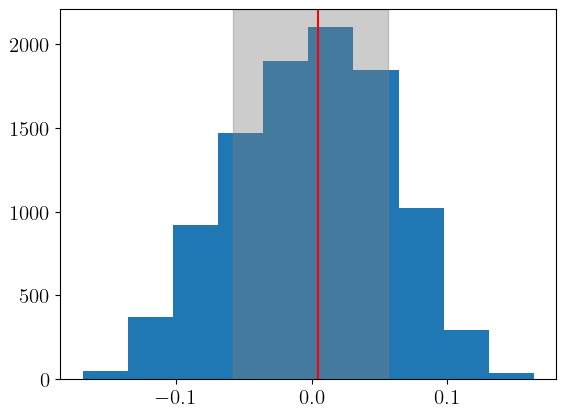

In [559]:
# Example data
x = fourlac_sutter.Voidiness
y = fourlac_sutter.Variability_Index
#sigma_y = fourlac_sutter.Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.005, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

(0.0, 5000.0)

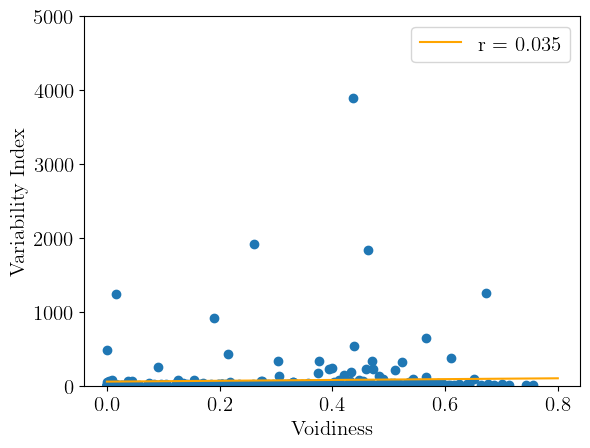

In [560]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index <5000].Voidiness, fourlac_sutter.Variability_Index[fourlac_sutter.Variability_Index <5000], absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index <5000].Voidiness, fourlac_sutter.Variability_Index[fourlac_sutter.Variability_Index <5000])

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter.Voidiness, fourlac_sutter.Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()
plt.ylim(0,5000)

In [471]:
fourlac_sutter[fourlac_sutter.Variability_Index < 24.725]

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,FluxInc95,FluxInc30,FluxInc40,FluxInc45,Average Void Size,Max Void Size,L1000,Unc_L1000,Energy_L100,Unc_Energy_L100
1,1,1,1,1,1,1,1,1,1108,1108,...,9.774921e-13,3.053028e-12,2.301279e-12,2.049014e-12,65.863223,93.672884,1.334071e+46,3.120553e+45,1.494914e+40,3.278415e+39
2,2,2,2,2,2,2,2,2,1120,1120,...,1.052458e-12,3.274994e-12,2.471907e-12,2.201930e-12,78.552726,100.272597,4.905313e+46,1.193551e+46,3.176198e+40,8.527501e+39
3,3,3,3,3,3,3,3,5,1132,1132,...,2.188867e-12,6.811208e-12,5.140982e-12,4.579496e-12,48.247250,75.538020,1.436451e+47,2.073991e+46,1.732345e+41,2.347149e+40
4,4,4,4,4,4,4,4,6,1161,1161,...,2.127373e-13,6.705342e-13,5.037569e-13,4.480382e-13,41.528399,90.516499,2.819431e+46,7.108350e+45,3.272292e+40,8.397728e+39
5,5,5,5,5,5,5,5,8,1172,1172,...,2.028467e-13,6.406332e-13,4.809439e-13,4.276449e-13,57.200000,100.272597,1.550424e+47,2.762895e+46,1.722178e+41,3.070490e+40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,295,295,295,295,295,295,319,2526,2526,...,1.468973e-13,4.639569e-13,3.483009e-13,3.096996e-13,55.680057,110.430416,1.804080e+47,4.812976e+46,2.012224e+41,5.147235e+40
297,297,297,297,297,297,297,297,321,2531,2531,...,5.136409e-14,1.622062e-13,1.217769e-13,1.082824e-13,39.633429,98.952654,6.615314e+46,2.091351e+46,1.255301e+41,3.706088e+40
299,299,299,299,299,299,299,299,323,2542,2542,...,2.109703e-12,6.522978e-12,4.934809e-12,4.399258e-12,54.491979,104.347202,8.902008e+45,1.281660e+45,1.099846e+40,1.708329e+39
301,301,301,301,301,301,301,301,326,2567,2567,...,5.604527e-13,1.768194e-12,1.327942e-12,1.180927e-12,58.083624,104.347202,2.782496e+47,2.800532e+46,3.281046e+41,3.364805e+40


## 4lac sources non-variable

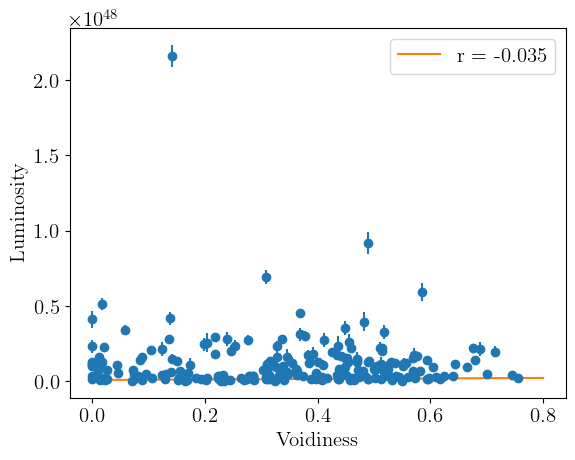

In [561]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, (fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].L1000)/1e45, sigma = (fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].L1000, yerr = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.legend()

Pearson r = -0.000 ± 0.069


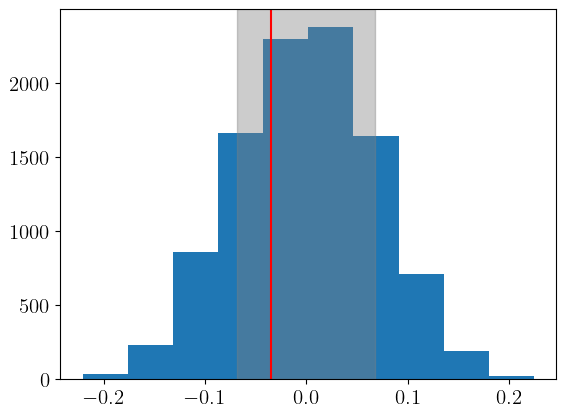

In [562]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].L1000
sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.035, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

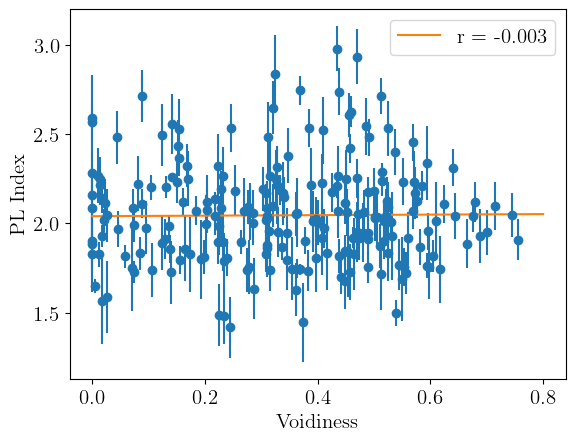

In [563]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].PL_Index, sigma = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].PL_Index, yerr = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

Pearson r = -0.000 ± 0.068


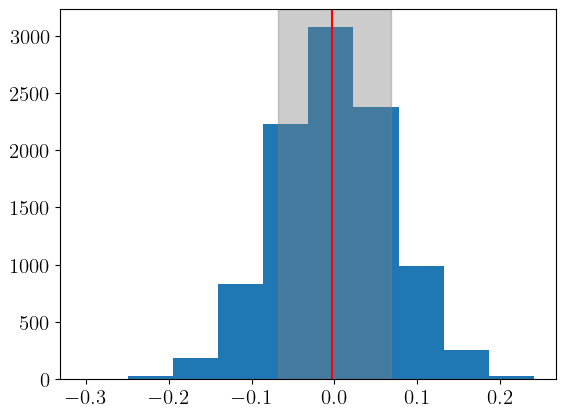

In [564]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].PL_Index
sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.003, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

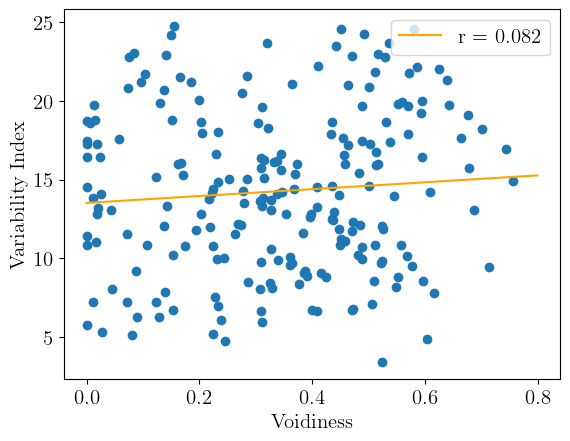

In [565]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

Pearson r = 0.000 ± 0.069


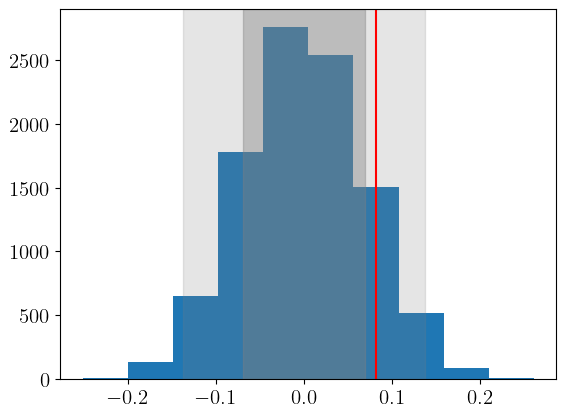

In [568]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Variability_Index
#sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.082, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)
plt.axvspan(r_mean - 2*r_std, r_mean+ 2*r_std, color = 'grey', alpha = 0.2)

In [443]:
fourlac_sutter_TeV

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45,L1000,Unc_L1000
30,30,30,30,30,35,1262,1262,4FGL J0847.2+1134,1,131.811905,...,1.039083e-11,8.940321e-12,7.845174e-12,6.989048e-12,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11,4.555180e+42,4.641758e+41
35,35,35,35,35,40,1280,1280,4FGL J0854.8+2006,1,133.707108,...,3.754677e-11,3.221539e-11,2.820979e-11,2.509013e-11,2.377549e-11,7.456793e-11,5.612236e-11,4.994501e-11,1.649993e+44,3.422726e+42
83,83,83,83,83,90,1470,1470,4FGL J1015.0+4926,1,153.768005,...,5.117937e-11,4.390731e-11,3.844472e-11,3.419095e-11,3.239856e-11,1.017218e-10,7.652945e-11,6.809702e-11,1.095855e+44,1.650131e+42
97,97,97,97,97,104,1514,1514,4FGL J1031.3+5053,1,157.845398,...,3.102474e-12,2.660457e-12,2.328683e-12,2.070483e-12,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12,4.500827e+43,2.158247e+42
115,115,115,115,115,122,1590,1590,4FGL J1058.6+2817,1,164.650299,...,1.290692e-12,1.106739e-12,9.686803e-13,8.612453e-13,8.159949e-13,2.574352e-12,1.933397e-12,1.719357e-12,4.219071e+43,3.411722e+42
139,139,139,139,139,150,1702,1702,4FGL J1136.8+2550,1,174.217102,...,9.498674e-13,8.146706e-13,7.131642e-13,6.341503e-13,6.008644e-13,1.891633e-12,1.421756e-12,1.264684e-12,1.504350e+42,2.110117e+41
162,162,162,162,162,176,1826,1826,4FGL J1217.9+3007,1,184.476196,...,5.266181e-11,4.517334e-11,3.954944e-11,3.517081e-11,3.332600e-11,1.047612e-10,7.878124e-11,7.009031e-11,4.469197e+43,6.983029e+41
164,164,164,164,164,178,1839,1839,4FGL J1221.3+3010,1,185.344894,...,1.425185e-11,1.222257e-11,1.069915e-11,9.513404e-12,9.013914e-12,2.839472e-11,2.133683e-11,1.897819e-11,3.627659e+43,1.025660e+42
165,165,165,165,165,179,1840,1840,4FGL J1221.5+2814,1,185.378403,...,2.617652e-11,2.246315e-11,1.967245e-11,1.749852e-11,1.658230e-11,5.193002e-11,3.910550e-11,3.480751e-11,8.683667e+42,2.346389e+41
168,168,168,168,168,182,1853,1853,4FGL J1224.4+2436,1,186.116104,...,5.406696e-12,4.637411e-12,4.059771e-12,3.610095e-12,3.420652e-12,1.076303e-11,8.091115e-12,7.197702e-12,1.666866e+43,8.535034e+41


## TeV Sources

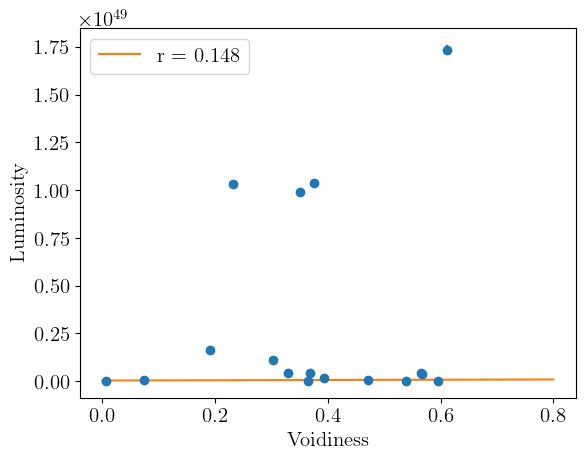

In [569]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV.Voidiness, (fourlac_sutter_TeV.L1000)/1e45, sigma = (fourlac_sutter_TeV.Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.L1000, yerr = fourlac_sutter_TeV.Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.legend()

Pearson r = 0.001 ± 0.251


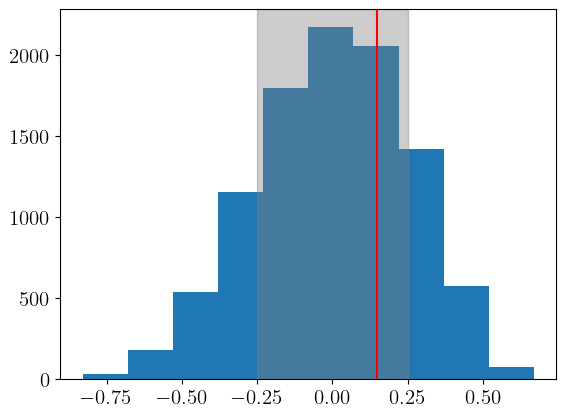

In [570]:
# Example data
x = fourlac_sutter_TeV.Voidiness
y = fourlac_sutter_TeV.L1000
sigma_y = fourlac_sutter_TeV.Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.148, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

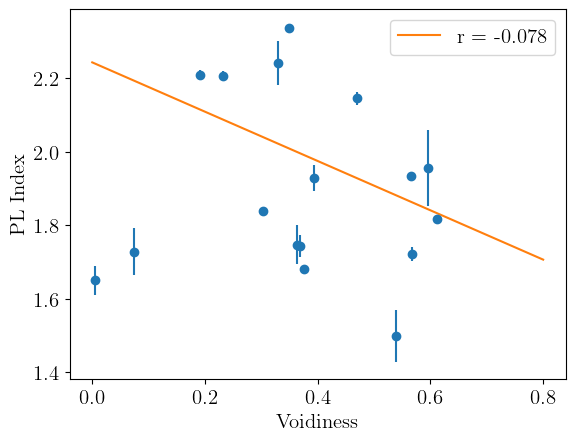

In [571]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.PL_Index, sigma = fourlac_sutter_TeV.Unc_PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.PL_Index, yerr = fourlac_sutter_TeV.Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

Pearson r = 0.004 ± 0.251


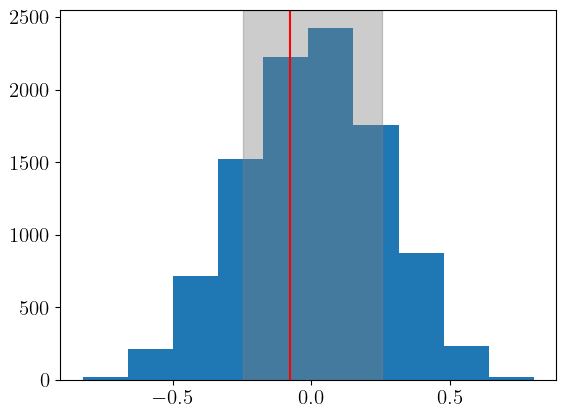

In [572]:
# Example data
x = fourlac_sutter_TeV.Voidiness
y = fourlac_sutter_TeV.PL_Index
sigma_y = fourlac_sutter_TeV.Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.078, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

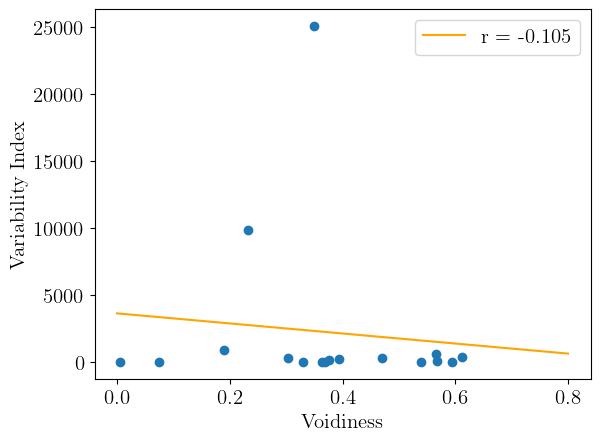

In [573]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter_TeV.Voidiness, fourlac_sutter_TeV.Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

Pearson r = 0.001 ± 0.249


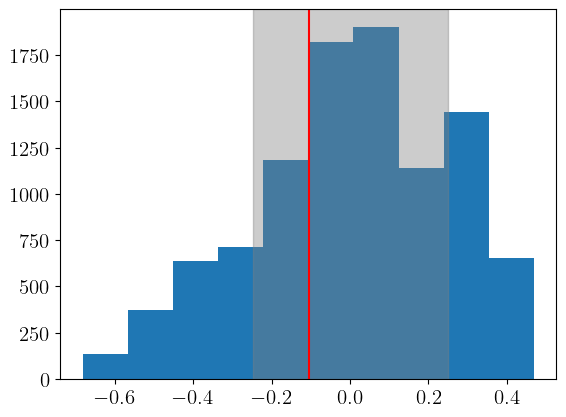

In [574]:
# Example data
x = fourlac_sutter_TeV.Voidiness
y = fourlac_sutter_TeV.Variability_Index
#sigma_y = fourlac_sutter_TeV.Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.105, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

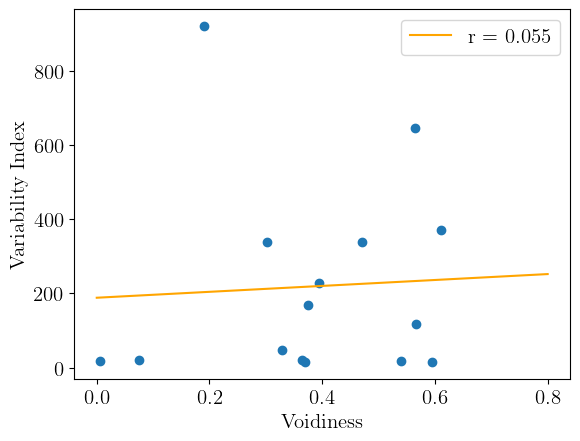

In [575]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 5000].Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

## Non-variable TeV

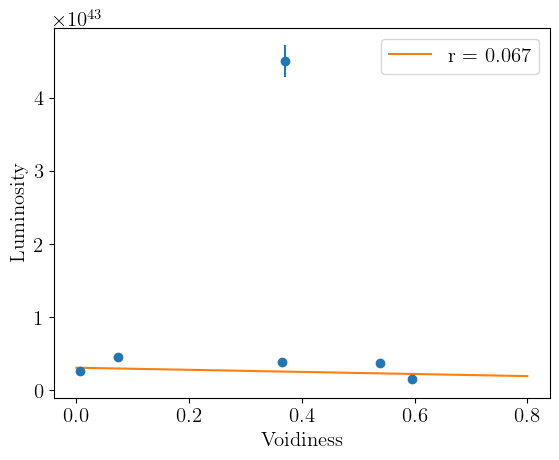

In [449]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, (fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].L1000)/1e45, sigma = (fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].L1000, yerr = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.legend()

In [450]:
import numpy as np
from scipy.stats import pearsonr

# Example data
x = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness
y = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].L1000
sigma_y = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    y_perturbed = y + np.random.normal(0, sigma_y)
    r, _ = pearsonr(x, y_perturbed)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

Pearson r = 0.067 ± 0.009


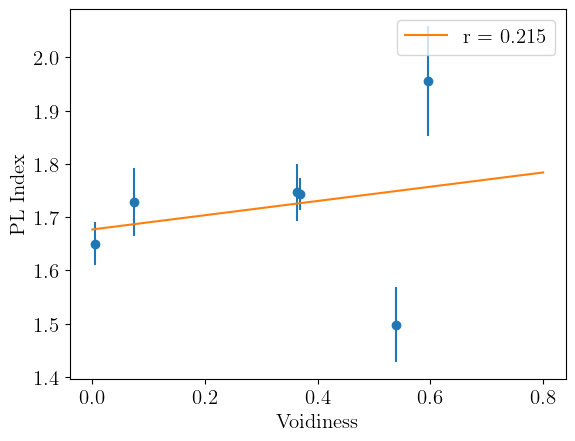

In [452]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].PL_Index, yerr = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

In [453]:
import numpy as np
from scipy.stats import pearsonr

# Example data
x = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness
y = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].PL_Index
sigma_y = fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    y_perturbed = y + np.random.normal(0, sigma_y)
    r, _ = pearsonr(x, y_perturbed)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

Pearson r = 0.197 ± 0.194


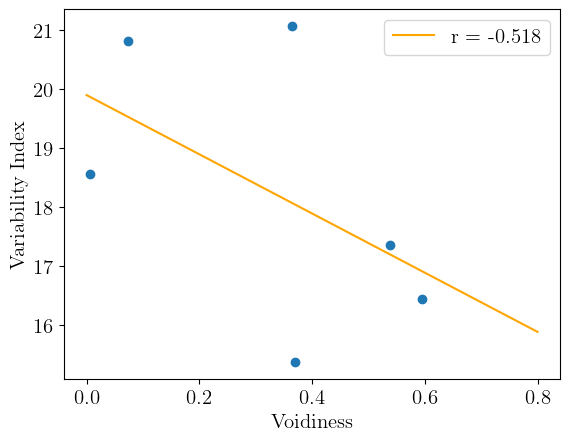

In [454]:
popt, pcov = curve_fit(line, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Voidiness, fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725].Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

In [455]:
fourlac_sutter_TeV[fourlac_sutter_TeV.Variability_Index < 24.725]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45,L1000,Unc_L1000
30,30,30,30,30,35,1262,1262,4FGL J0847.2+1134,1,131.811905,...,1.039083e-11,8.940321e-12,7.845174e-12,6.989048e-12,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11,4.555180e+42,4.641758e+41
97,97,97,97,97,104,1514,1514,4FGL J1031.3+5053,1,157.845398,...,3.102474e-12,2.660457e-12,2.328683e-12,2.070483e-12,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12,4.500827e+43,2.158247e+42
139,139,139,139,139,150,1702,1702,4FGL J1136.8+2550,1,174.217102,...,9.498674e-13,8.146706e-13,7.131642e-13,6.341503e-13,6.008644e-13,1.891633e-12,1.421756e-12,1.264684e-12,1.504350e+42,2.110117e+41
235,235,235,235,235,253,2153,2153,4FGL J1417.9+2543,1,214.494003,...,6.800376e-13,5.831540e-13,5.104335e-13,4.538388e-13,4.300006e-13,1.355770e-12,1.018439e-12,9.057581e-13,3.692927e+42,5.775009e+41
245,245,245,245,245,263,2192,2192,4FGL J1428.5+4240,1,217.128601,...,2.119291e-10,1.913890e-10,1.744786e-10,1.603139e-10,1.540604e-10,3.125626e-10,2.698502e-10,2.525916e-10,2.666680e+42,1.724378e+41
250,250,250,250,250,268,2232,2232,4FGL J1442.7+1200,1,220.697998,...,3.475690e-12,2.982015e-12,2.611138e-12,2.322309e-12,2.200600e-12,6.905153e-12,5.196142e-12,4.623935e-12,3.878753e+42,3.399319e+41


## Variable 4LAC

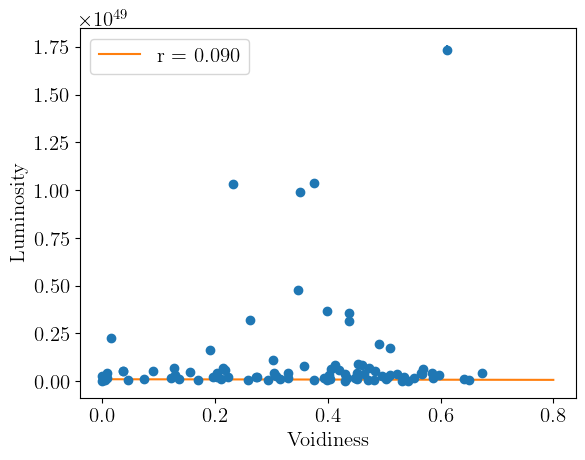

In [603]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, (fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].L1000)/1e45, sigma = (fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].L1000, yerr = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.legend()

Pearson r = -0.001 ± 0.108


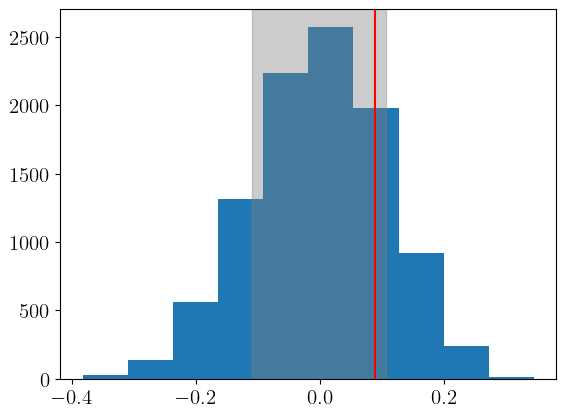

In [605]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].L1000
sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.090, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

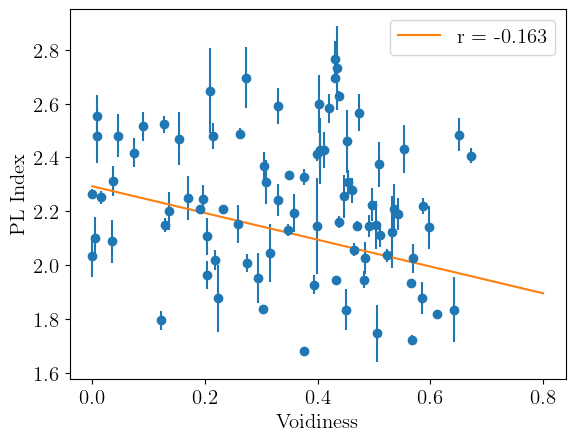

In [606]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].PL_Index, sigma = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].PL_Index, yerr = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

Pearson r = 0.000 ± 0.107


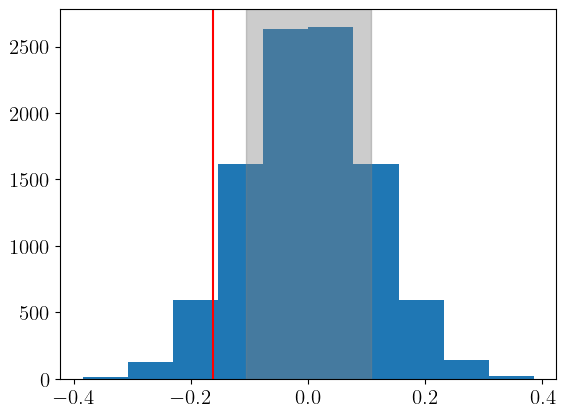

In [607]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].PL_Index
sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.163, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

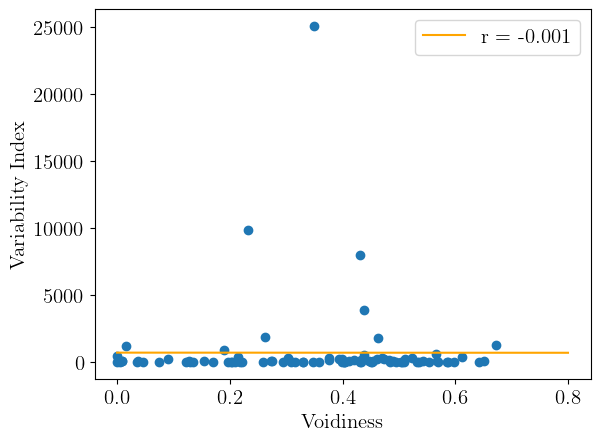

In [608]:
popt, pcov = curve_fit(line, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness, fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.legend()

Pearson r = -0.001 ± 0.108


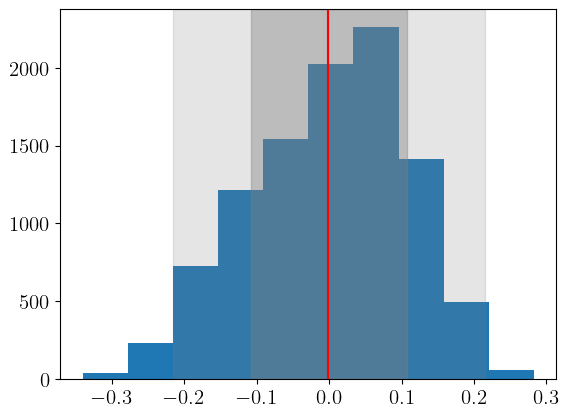

In [609]:
# Example data
x = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Voidiness
y = fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725].Variability_Index
#sigma_y = fourlac_sutter[fourlac_sutter.Variability_Index < 24.725].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.001, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)
plt.axvspan(r_mean - 2*r_std, r_mean+ 2*r_std, color = 'grey', alpha = 0.2)

In [611]:
fourlac_sutter[fourlac_sutter.Variability_Index >= 24.725]

,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,...,FluxInc95,FluxInc30,FluxInc40,FluxInc45,Average Void Size,Max Void Size,L1000,Unc_L1000,Energy_L100,Unc_Energy_L100
0,0,0,0,0,0,0,0,0,1107,1107,...,1.431097e-12,4.510846e-12,3.388862e-12,3.014022e-12,63.201958,100.272597,4.100695e+47,2.939191e+46,5.258768e+41,3.449817e+40
18,18,18,18,18,18,18,18,23,1228,1228,...,3.237946e-09,3.237946e-09,3.237946e-09,3.237946e-09,49.244381,58.149211,2.794400e+47,7.772266e+45,2.813619e+41,7.631512e+39
19,19,19,19,19,19,19,19,24,1230,1230,...,6.207576e-12,1.909464e-11,1.447235e-11,1.290979e-11,60.939742,72.439024,5.628979e+47,4.263310e+46,6.896011e+41,4.597622e+40
21,21,21,21,21,21,21,21,26,1233,1233,...,6.880843e-12,2.116056e-11,1.603954e-11,1.430819e-11,28.680057,66.958393,9.686790e+46,7.744525e+45,1.093120e+41,9.846968e+39
26,26,26,26,26,26,26,26,31,1249,1249,...,6.529380e-13,2.055490e-12,1.544934e-12,1.374260e-12,66.022956,73.615495,5.015152e+47,8.168682e+46,4.640487e+41,8.768156e+40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,283,283,283,283,283,283,306,2418,2418,...,2.457598e-11,7.754528e-11,5.823515e-11,5.178719e-11,46.134695,90.760402,1.037668e+49,1.674199e+47,1.259612e+43,2.234119e+41
294,294,294,294,294,294,294,294,318,2519,2519,...,3.984784e-13,1.259083e-12,9.450689e-13,8.402857e-13,49.216812,95.609756,8.520650e+47,7.819558e+46,8.182293e+41,1.156058e+41
296,296,296,296,296,296,296,296,320,2527,2527,...,2.926703e-12,9.244095e-12,6.939582e-12,6.170449e-12,50.411286,98.952654,3.679889e+48,1.196615e+47,4.309389e+42,2.179856e+41
298,298,298,298,298,298,298,298,322,2534,2534,...,1.052712e-12,3.304674e-12,2.486385e-12,2.212465e-12,40.283201,83.428981,1.483957e+46,2.015632e+45,3.199088e+40,2.831245e+39


For variable 4LAC sources we get the following:

1. Voidiness vs. luminosity: 0.090
2. Voidiness vs. PL Index: -0.163
3. Voidiness vs. Var. Index: -0.001

# Correlation plots for sources in voids

comparing voidiness to luminosity, pl index, and variability index for sources in voids, both full redshift range 
and just the distant redshift bin

In [536]:
fourlac_invoids = pd.read_excel('exported_dataFrames/4lacsutter_invoids.xlsx')

In [537]:
fourlac_invoids['L1000'] = fourlac_invoids.Flux1000*100**2 * 4 * np.pi * (fourlac_invoids['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_invoids.z)**2
fourlac_invoids['Unc_L1000'] = 100**2 * 4 * np.pi * (fourlac_invoids['cmvd_Mpc']*3.08567758128e22)**2 * (1 + fourlac_invoids.z)**2 * fourlac_invoids.Unc_Flux1000


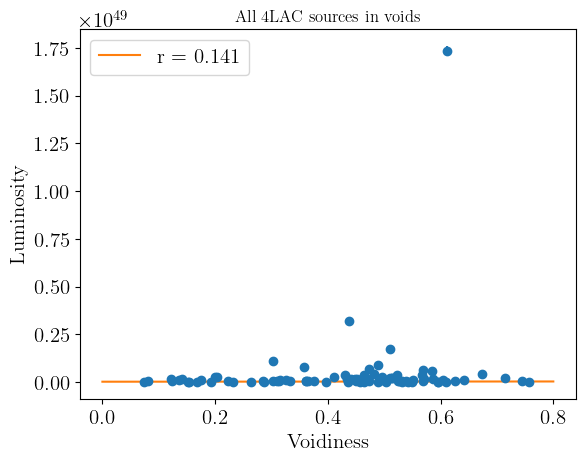

In [576]:
popt, pcov = curve_fit(line, fourlac_invoids.Voidiness, (fourlac_invoids.L1000)/1e45, sigma = (fourlac_invoids.Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids.Voidiness, fourlac_invoids.L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_invoids.Voidiness, fourlac_invoids.L1000, yerr = fourlac_invoids.Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.title('All 4LAC sources in voids')
plt.legend()

Pearson r = 0.000 ± 0.110


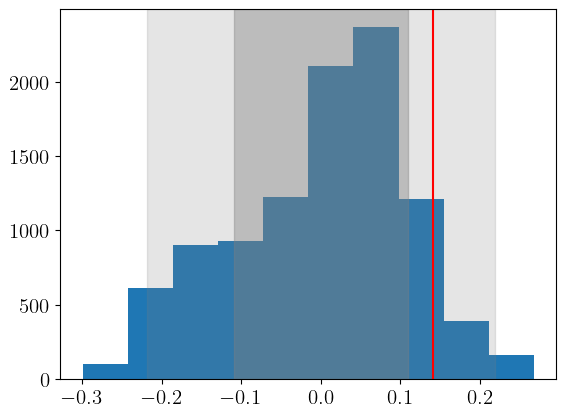

In [578]:
# Example data
x = fourlac_invoids.Voidiness
y = fourlac_invoids.L1000
sigma_y = fourlac_invoids.Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.141, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)
plt.axvspan(r_mean - 2*r_std, r_mean+ 2*r_std, color = 'grey', alpha = 0.2)

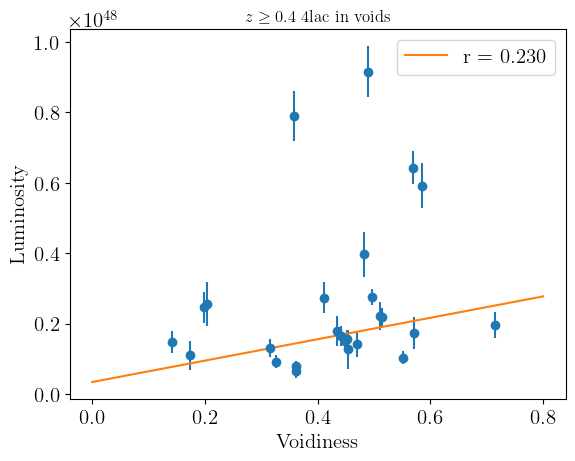

In [594]:
popt, pcov = curve_fit(line, fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Voidiness, (fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].L1000)/1e45, sigma = (fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Unc_L1000)/1e45, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Voidiness, fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].L1000)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0]*1e45, popt[1]*1e45)
plt.errorbar(fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Voidiness, fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].L1000, yerr = fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Unc_L1000, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('Luminosity')
plt.title(r'$z \geq 0.4$ 4lac in voids')
plt.legend()

Pearson r = 0.002 ± 0.198


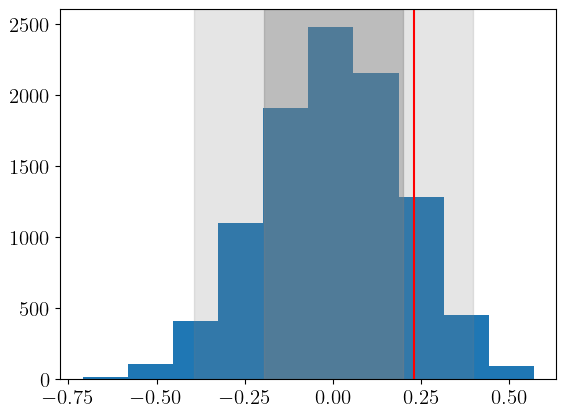

In [596]:
# Example data
x = fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Voidiness
y = fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].L1000
sigma_y = fourlac_invoids[(fourlac_invoids.z >= 0.4) & (fourlac_invoids['Variability_Index']<100)].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.230, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)
plt.axvspan(r_mean - 2*r_std, r_mean+ 2*r_std, color = 'grey', alpha = 0.2)

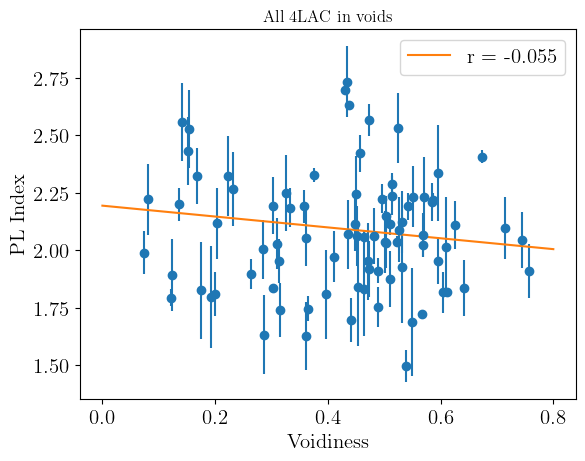

In [582]:
popt, pcov = curve_fit(line, fourlac_invoids.Voidiness, fourlac_invoids.PL_Index, sigma = fourlac_invoids.Unc_PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids.Voidiness, fourlac_invoids.PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_invoids.Voidiness, fourlac_invoids.PL_Index, yerr = fourlac_invoids.Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.title('All 4LAC in voids')
plt.legend()

Pearson r = -0.000 ± 0.110


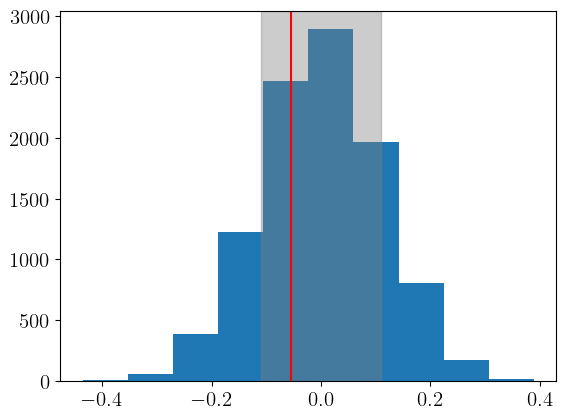

In [583]:
# Example data
x = fourlac_invoids.Voidiness
y = fourlac_invoids.PL_Index
sigma_y = fourlac_invoids.Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(-0.055, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

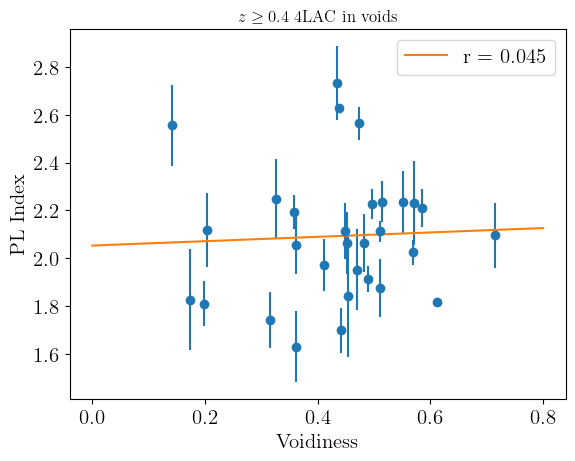

In [584]:
popt, pcov = curve_fit(line, fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].PL_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].PL_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.errorbar(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].PL_Index, yerr = fourlac_invoids[fourlac_invoids.z >= 0.4].Unc_PL_Index, fmt = 'o')
plt.plot(x,y, label = f'r = {r:.3f}')
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.title(r'$z \geq 0.4$ 4LAC in voids')
plt.legend()

Pearson r = 0.000 ± 0.185


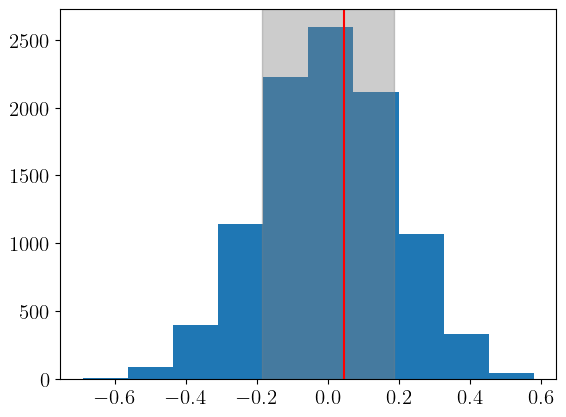

In [585]:
# Example data
x = fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness
y = fourlac_invoids[fourlac_invoids.z >= 0.4].PL_Index
sigma_y = fourlac_invoids[fourlac_invoids.z >= 0.4].Unc_PL_Index  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.045, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

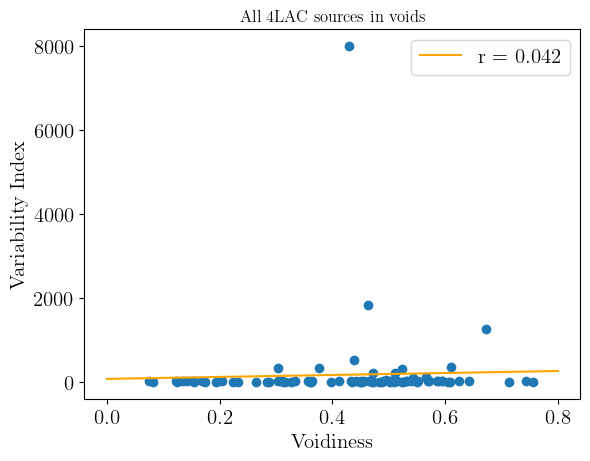

In [586]:
popt, pcov = curve_fit(line, fourlac_invoids.Voidiness, fourlac_invoids.Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids.Voidiness, fourlac_invoids.Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_invoids.Voidiness, fourlac_invoids.Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.title('All 4LAC sources in voids')
plt.legend()

Pearson r = 0.000 ± 0.109


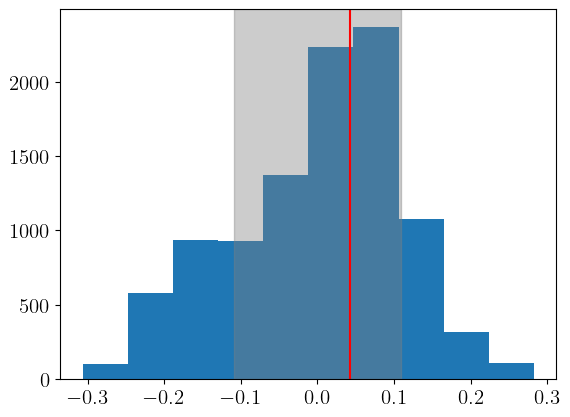

In [587]:
# Example data
x = fourlac_invoids.Voidiness
y = fourlac_invoids.Variability_Index
#sigma_y = fourlac_invoids[fourlac_invoids.z >= 0.4].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.042, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

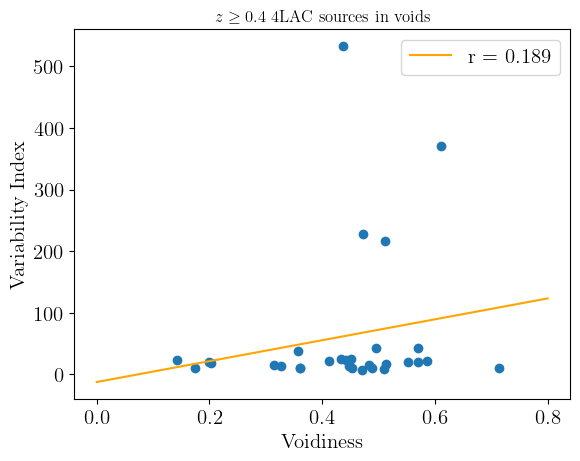

In [591]:
popt, pcov = curve_fit(line, fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].Variability_Index, absolute_sigma = True)

r, _ = pearsonr(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].Variability_Index)

x = np.linspace(0,0.8, 100)
y = line(x, popt[0], popt[1])
plt.scatter(fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness, fourlac_invoids[fourlac_invoids.z >= 0.4].Variability_Index)
plt.plot(x,y, label = f'r = {r:.3f}', color = 'orange')
plt.xlabel('Voidiness')
plt.ylabel('Variability Index')
plt.title(r'$z \geq 0.4$ 4LAC sources in voids')
plt.legend()

Pearson r = -0.003 ± 0.185


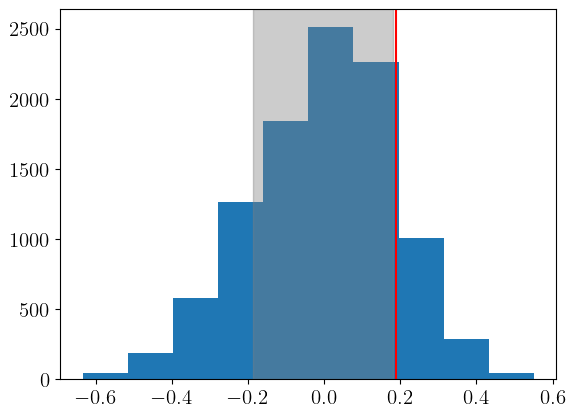

In [589]:
# Example data
x = fourlac_invoids[fourlac_invoids.z >= 0.4].Voidiness
y = fourlac_invoids[fourlac_invoids.z >= 0.4].Variability_Index
#sigma_y = fourlac_invoids[fourlac_invoids.z >= 0.4].Unc_L1000  # Uncertainties on y

# Number of Monte Carlo samples
n_samples = 10000
r_vals = []

# Monte Carlo loop: perturb y according to its uncertainty
for _ in range(n_samples):
    x_shuffled = x.sample(frac = 1).reset_index(drop = True)
    r, _ = pearsonr(x_shuffled, y)
    r_vals.append(r)

# Convert to numpy array
r_vals = np.array(r_vals)

# Compute mean and standard deviation of Pearson r
r_mean = np.mean(r_vals)
r_std = np.std(r_vals)

# Output
print(f"Pearson r = {r_mean:.3f} ± {r_std:.3f}")

plt.hist(r_vals)
plt.axvline(0.189, color = 'r')
plt.axvspan(r_mean - r_std, r_mean+ r_std, color = 'grey', alpha = 0.4)

Notes from updating TeV flags 

### RXJ1136.5+6737 173.939 67.612 0.13 Y 11.7±3.3 1.98±0.34 0.00 No # [Y]in 4LAC, flagged, not in footprint ( edge of footprint)




### RXJ0847.1+1133 131.773 11.544 0.2 Y 9.6±3.6 1.45±0.39 0.00 No # [Y] in 4LAC, flagged, in footprint, not in void, we have voidiness 0.074 (cleared)

### RGBJ2313+147 348.514 14.769 0.16 C 10.6±3.8 1.77±0.39 0.00 No # [C] in 4LAC, not flagged, not in footprint 


 


### 1RXSJ115404.9-001008 178.525-0.169 0.25 N 11.6±4.1 2.21±0.54 0.03 No # [N]

### PMNJ1256-1146 194.110-11.77 0.06 C 11.9±4.1 2.07±0.44 0.05 No # [C] in 4LAC, not flagged, in footprint, not in redshift range





### RXJ1136.8+2551 174.267 25.893 0.16 C 7.3±3.1 1.62±0.44 0.49 Yes # [C] in 4LAC, not flagged, in footprint (ADD FLAG)





### BZBJ1417+2543 214.659 25.658 0.24 N 8.4±3.4 2.62±0.70 0.53 No # [N]





### RXJ1100.3+4019 165.165 40.315 0.23 C 11.2±3.8 2.23±0.45 0.60 Yes # [C] in 4LAC but without redshift, not flagged, not in footprint bc no redshift (ADD/DONT FLAG)




### GB6J1053+4930 163.403 49.521 0.14 C 7.7±2.9 1.49±0.37 0.62 No # [C] in 4LAC, not flagged, in footprint (dont flag)



In [600]:
#everything below this is graveyard - not used

# Sutter Bl Lac TEV Sources

In [25]:
fourlac_sutter = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')

In [33]:
#cut = fourlac_sutter.TeVflag[0]
fourlac_sutter_TeV = fourlac_sutter[fourlac_sutter.TeVflag == 1]

In [34]:
fourlac_sutter_TeV

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
21,30,30,30,30,35,1262,1262,4FGL J0847.2+1134,1,131.811905,...,2.404459e-11,1.240316e-11,1.039083e-11,8.940321e-12,7.845174e-12,6.989048e-12,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11
25,35,35,35,35,40,1280,1280,4FGL J0854.8+2006,1,133.707108,...,8.923169e-11,4.499270e-11,3.754677e-11,3.221539e-11,2.820979e-11,2.509013e-11,2.377549e-11,7.456793e-11,5.612236e-11,4.994501e-11
60,83,83,83,83,90,1470,1470,4FGL J1015.0+4926,1,153.768005,...,1.217630e-10,6.133843e-11,5.117937e-11,4.390731e-11,3.844472e-11,3.419095e-11,3.239856e-11,1.017218e-10,7.652945e-11,6.809702e-11
69,97,97,97,97,104,1514,1514,4FGL J1031.3+5053,1,157.845398,...,7.413354e-12,3.720633e-12,3.102474e-12,2.660457e-12,2.328683e-12,2.070483e-12,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12
82,115,115,115,115,122,1590,1590,4FGL J1058.6+2817,1,164.650299,...,3.085860e-12,1.547985e-12,1.290692e-12,1.106739e-12,9.686803e-13,8.612453e-13,8.159949e-13,2.574352e-12,1.933397e-12,1.719357e-12
118,162,162,162,162,176,1826,1826,4FGL J1217.9+3007,1,184.476196,...,1.254455e-10,6.312639e-11,5.266181e-11,4.517334e-11,3.954944e-11,3.517081e-11,3.332600e-11,1.047612e-10,7.878124e-11,7.009031e-11
120,164,164,164,164,178,1839,1839,4FGL J1221.3+3010,1,185.344894,...,3.402163e-11,1.708910e-11,1.425185e-11,1.222257e-11,1.069915e-11,9.513404e-12,9.013914e-12,2.839472e-11,2.133683e-11,1.897819e-11
121,165,165,165,165,179,1840,1840,4FGL J1221.5+2814,1,185.378403,...,6.211527e-11,3.136073e-11,2.617652e-11,2.246315e-11,1.967245e-11,1.749852e-11,1.658230e-11,5.193002e-11,3.910550e-11,3.480751e-11
124,168,168,168,168,182,1853,1853,4FGL J1224.4+2436,1,186.116104,...,1.289162e-11,6.481969e-12,5.406696e-12,4.637411e-12,4.059771e-12,3.610095e-12,3.420652e-12,1.076303e-11,8.091115e-12,7.197702e-12
177,235,235,235,235,253,2153,2153,4FGL J1417.9+2543,1,214.494003,...,1.624866e-12,8.155272e-13,6.800376e-13,5.831540e-13,5.104335e-13,4.538388e-13,4.300006e-13,1.355770e-12,1.018439e-12,9.057581e-13


# DES Combined TeV sources

In [30]:
fourlac_des = pd.read_excel('exported_dataFrames/4lacdes_bll.xlsx')

In [35]:
fourlac_des_TeV = fourlac_des[fourlac_des.TeVflag == 1]

In [32]:
fourlac_des[fourlac_des.TeVflag == 1]

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,DEdeg,GLON,GLAT,Signif_Avg,...,nu_syn,nuFnu_syn,Variability_Index,Frac_Variability,Unc_Frac_Variability,Highest_energy,TeVflag,81,cmvd_Mpc,Voidiness
39,58,449,449,4FGL J0238.4-3116,1,39.620899,-31.282801,229.459335,-66.334457,37.024403,...,20183664084123648,1.184325e-11,42.035160,0.314127,0.089513,407.766998,1.0,NaN,955.086588,0.296086
46,68,503,503,4FGL J0303.4-2407,1,45.862499,-24.122499,214.627457,-60.176105,107.543800,...,2511886390132736,1.218170e-11,485.315826,0.431658,0.093976,254.257996,1.0,NaN,1081.601871,0.407603
57,83,620,620,4FGL J0349.4-1159,1,57.353901,-11.994100,201.935440,-45.704231,17.681461,...,1819700814940208896,7.376172e-12,22.979275,0.366393,0.146767,98.758400,1.0,NaN,779.020414,0.000000


# Combining

In [36]:
fourlac_comb_TeV = pd.concat([fourlac_sutter_TeV, fourlac_des_TeV], ignore_index = True)

In [72]:
fourlac_comb_TeV.iloc[[1]]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
1,35.0,35.0,35.0,35.0,40,1280,1280,4FGL J0854.8+2006,1,133.707108,...,8.923169e-11,4.499270e-11,3.754677e-11,3.221539e-11,2.820979e-11,2.509013e-11,2.377549e-11,7.456793e-11,5.612236e-11,4.994501e-11


In [38]:
fourlac_comb_TeV.to_excel('exported_dataFrames/4lacdessdss_bllTeV.xlsx')

In [40]:
fourlac_comb_TeV[fourlac_comb_TeV.z > 0.4]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
4,115.0,115.0,115.0,115.0,122,1590,1590,4FGL J1058.6+2817,1,164.650299,...,3.085860e-12,1.547985e-12,1.290692e-12,1.106739e-12,9.686803e-13,8.612453e-13,8.159949e-13,2.574352e-12,1.933397e-12,1.719357e-12
10,244.0,244.0,244.0,244.0,262,2185,2185,4FGL J1427.0+2348,1,216.755798,...,3.215231e-11,1.609947e-11,1.341947e-11,1.150439e-11,1.006765e-11,8.949921e-12,8.479232e-12,2.680654e-11,2.011705e-11,1.788542e-11
13,283.0,283.0,283.0,283.0,306,2418,2418,4FGL J1555.7+1111,1,238.931305,...,9.295705e-11,4.662477e-11,3.887436e-11,3.333337e-11,2.917490e-11,2.593892e-11,2.457598e-11,7.754528e-11,5.823515e-11,5.178719e-11


### low redshift (0.1 - 0.4) 14 sources

KS: 0.2471

median P-value: 0.3240888258813331

Significance (one-tail): 0.4562952881484521 Sigma

### high redshift (0.4 - 0.7) 3 sources

KS: 0.5128

median P-value: 0.30488765983229615

Significance (one-tail): 0.5103941996852761 Sigma

In [43]:
from scipy import stats

In [44]:
cmap = plt.get_cmap("tab10")

params = {#'backend': 'ps',
      'axes.labelsize': 15,
      'xtick.labelsize': 15,
      'ytick.labelsize': 15,
      'legend.fontsize': 15}
plt.rcParams.update(params)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [45]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSDEScomb_01-04_z-matched_bllTeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacdessdss_bllTeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.4:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


Text(0.5, 1.0, '4LAC BLL vs DES + SDSS z-matched CDF ($0.1 < z < 0.4$)')

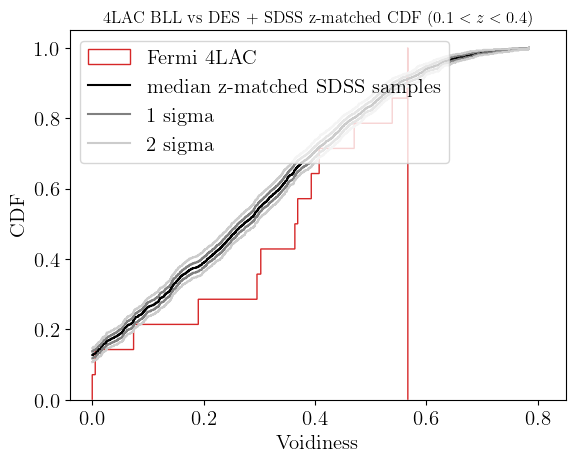

In [46]:
nbins = 2000
plt.figure("4LAC BLL vs DES + SDSS z-matched CDF (14 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs DES + SDSS z-matched CDF ($0.1 < z < 0.4$)")

#plt.savefig("sutter_bll_fullredshift.png", dpi = 300, bbox_inches = 'tight')

In [47]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSDEScomb_04-07_z-matched_bllTeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacdessdss_bllTeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.4 <= z_4LAC[i] < 0.8:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


Text(0.5, 1.0, '4LAC BLL vs DES + SDSS z-matched CDF ($0.4 < z < 0.7$)')

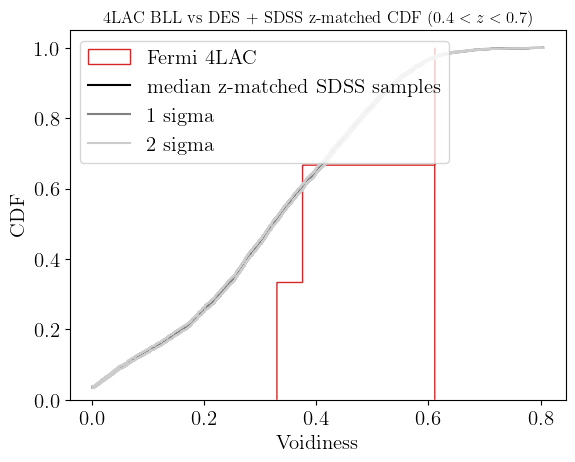

In [48]:
nbins = 2000
plt.figure("4LAC BLL vs DES + SDSS z-matched CDF (3 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs DES + SDSS z-matched CDF ($0.4 < z < 0.7$)")

#plt.savefig("sutter_bll_fullredshift.png", dpi = 300, bbox_inches = 'tight')

### 0.1 - 0.7

KS: 0.274

median P-value: 0.13847879948465164

Significance (one-tail): 1.0871792506280193 Sigma

In [89]:
#using Olivier's code for creating the SDSS and 4lac CDF's
f = fits.open("exported_dataFrames/SDSSDEScomb_01-07_z-matched_bllTeV.fits")  # open a FITS file
tbdata = f[1].data  # assume the first extension is a table
tbcolumns = f[1].columns

four_lac = pd.read_excel('exported_dataFrames/4lacdessdss_bllTeV.xlsx')
z_4LAC = four_lac["z"]

z_4LAC_04 = []
Voidiness = []
for i in range(len(z_4LAC)):
    if 0.1 <= z_4LAC[i] < 0.8:
        z_4LAC_04.append(z_4LAC[i])
        Voidiness.append(four_lac["Voidiness"][i])
Voidiness = np.array(Voidiness)


Text(0.5, 1.0, '4LAC BLL vs DES + SDSS z-matched CDF ($0.1 < z < 0.7$)')

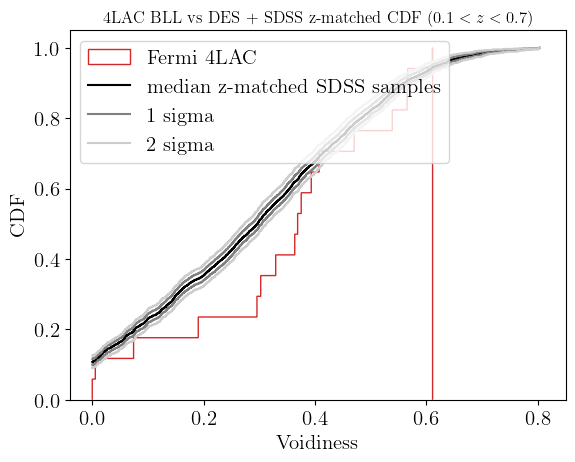

In [90]:
nbins = 2000
plt.figure("4LAC BLL vs DES + SDSS z-matched CDF (17 sources)")
all_hist = [0]*499
for i in range(499):
    if i == 0:
        aa = plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)
        bins = aa[1]
        all_hist[i] = list(aa[0])
    else:
        all_hist[i] = list(plt.hist(tbdata["Voidiness"+str(i+1)],bins=nbins,cumulative=True,density=True, fill=False,histtype='step',color='0.5',lw=2,alpha=0.)[0])
plt.hist(Voidiness,fill=False,bins=nbins,cumulative=True,density=True, histtype='step',color=cmap(3),label="Fermi 4LAC")


all_hist = np.array(all_hist)
median = np.zeros(nbins)
Onesigma_low = np.zeros(nbins)
Onesigma_up = np.zeros(nbins)
Twosigma_low = np.zeros(nbins)
Twosigma_up = np.zeros(nbins)
for i in range(nbins):
    median[i] = np.percentile(all_hist[:,i], 50)#np.median(all_hist[:,i])
    Onesigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(1)*100)
    Onesigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-1)*100)
    Twosigma_up[i] = np.percentile(all_hist[:,i], stats.norm.cdf(2)*100)
    Twosigma_low[i] = np.percentile(all_hist[:,i], stats.norm.cdf(-2)*100)

#plt.hist(median,bins=nbins,density=True, fill=False,histtype='step',color='b')
binstep = (bins[0] + bins[1])
plt.plot(bins[:-1]+binstep/2, median, color="0", ds="steps-mid", label="median z-matched SDSS samples")
plt.plot(bins[:-1]+binstep/2, Onesigma_low, color="0.5", ds="steps-mid",label="1 sigma")
plt.plot(bins[:-1]+binstep/2, Onesigma_up, color="0.5", ds="steps-mid")
plt.plot(bins[:-1]+binstep/2, Twosigma_low, color="0.8", ds="steps-mid",label="2 sigma")
plt.plot(bins[:-1]+binstep/2, Twosigma_up, color="0.8", ds="steps-mid")
plt.xlabel(r'Voidiness')
plt.ylabel(r'CDF')
plt.legend(loc="upper left")
plt.title("4LAC BLL vs DES + SDSS z-matched CDF ($0.1 < z < 0.7$)")

#plt.savefig("sutter_bll_fullredshift.png", dpi = 300, bbox_inches = 'tight')

### 0.1 - 0.7
KS: 0.274

median P-value: 0.13847879948465164

Significance (one-tail): 1.0871792506280193 Sigma

### 0.2 -0.7

KS: 0.4167

median P-value: 0.04487251248001495

Significance (one-tail): 1.6967442389959968 Sigma

### 0.3 - 0.7

KS: 0.2974

median P-value: 0.675285447281838

Significance (one-tail): -0.45455543033047174 Sigma

### 0.35 - 0.7

KS: 0.509

median P-value: 0.17376320096582007

Significance (one-tail): 0.939398073166346 Sigma

### 0.4 - 0.7 (3 sources)
 
KS: 0.5122

median P-value: 0.3060998529371171

Significance (one-tail): 0.5069360274153788 Sigma

### 0.45 - 0.7  (2 sources)

KS: 0.5281

median P-value: 0.44608946962522905

Significance (one-tail): 0.13554759099709968 Sigma

### 0.5 - 0.7 (1 source)

KS: 0.9785

median P-value: 0.04410143329658212

Significance (one-tail): 1.7049547363263233 Sigma

### 0.55 - 0.7 (1 source)

KS: 0.982

median P-value: 0.037490987743330866

Significance (one-tail): 1.7805745804797752 Sigma


### 0.6 - 0.7 (1 source)

KS: 0.9827

median P-value: 0.036756756756756756

Significance (one-tail): 1.7896293713113014 Sigma


Text(0.5, 1.0, 'TeV BL Lac sources v. QSOs ')

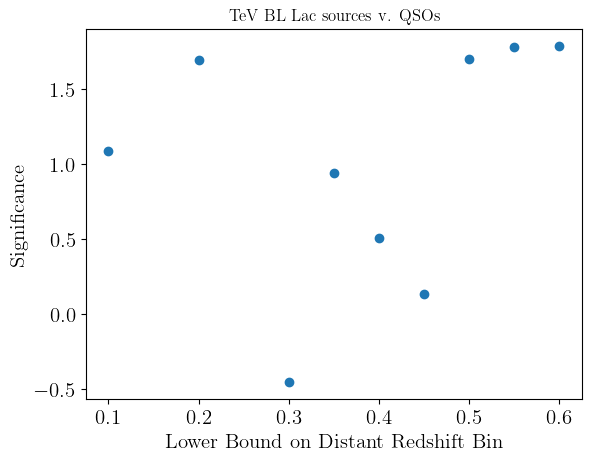

In [96]:
sigma = [1.0871792506280193,1.6967442389959968,-0.45455543033047174, 0.939398073166346, 0.5069360274153788, 0.13554759099709968 ,1.7049547363263233,1.7805745804797752,1.7896293713113014]
KS_vals = [0.274,0.4167, 0.2974, 0.509, 0.5122, 0.5281,0.9785,0.982,0.9827]

x = [0.1, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]

plt.scatter(x, sigma)
plt.xlabel("Lower Bound on Distant Redshift Bin")
plt.ylabel("Significance")
plt.title('TeV BL Lac sources v. QSOs ')



Text(0, 0.5, 'KS Statistics')

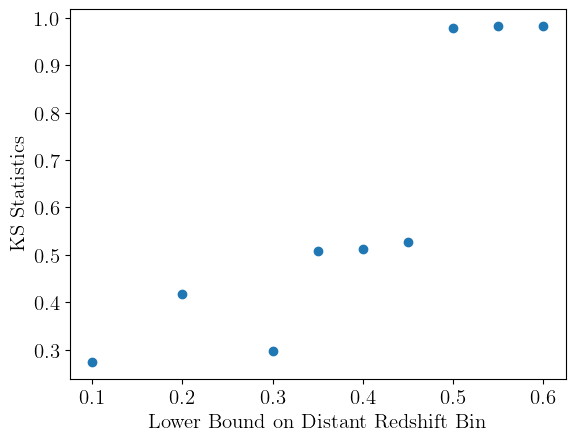

In [95]:
plt.scatter(x, KS_vals)
plt.xlabel("Lower Bound on Distant Redshift Bin")
plt.ylabel("KS Statistics")

# TeV Comparison Plots

In [116]:
from scipy.optimize import curve_fit
import numpy as np
from scipy.stats import pearsonr

def line(x, a,b):
    return a*x + b


In [49]:
fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725]

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Source_Name,DataRelease,RAdeg,...,FluxInc25,FluxInc50,FluxInc60,FluxInc70,FluxInc80,FluxInc90,FluxInc95,FluxInc30,FluxInc40,FluxInc45
0,30.0,30.0,30.0,30.0,35,1262,1262,4FGL J0847.2+1134,1,131.811905,...,2.404459e-11,1.240316e-11,1.039083e-11,8.940321e-12,7.845174e-12,6.989048e-12,6.627430e-12,2.024437e-11,1.538212e-11,1.373295e-11
3,97.0,97.0,97.0,97.0,104,1514,1514,4FGL J1031.3+5053,1,157.845398,...,7.413354e-12,3.720633e-12,3.102474e-12,2.660457e-12,2.328683e-12,2.070483e-12,1.961726e-12,6.185529e-12,4.646417e-12,4.132308e-12
9,235.0,235.0,235.0,235.0,253,2153,2153,4FGL J1417.9+2543,1,214.494003,...,1.624866e-12,8.155272e-13,6.800376e-13,5.831540e-13,5.104335e-13,4.538388e-13,4.300006e-13,1.355770e-12,1.018439e-12,9.057581e-13
11,245.0,245.0,245.0,245.0,263,2192,2192,4FGL J1428.5+4240,1,217.128601,...,3.394251e-10,2.374079e-10,2.119291e-10,1.913890e-10,1.744786e-10,1.603139e-10,1.540604e-10,3.125626e-10,2.698502e-10,2.525916e-10
12,250.0,250.0,250.0,250.0,268,2232,2232,4FGL J1442.7+1200,1,220.697998,...,8.264200e-12,4.165251e-12,3.475690e-12,2.982015e-12,2.611138e-12,2.322309e-12,2.200600e-12,6.905153e-12,5.196142e-12,4.623935e-12
16,NaN,NaN,NaN,NaN,83,620,620,4FGL J0349.4-1159,1,57.353901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


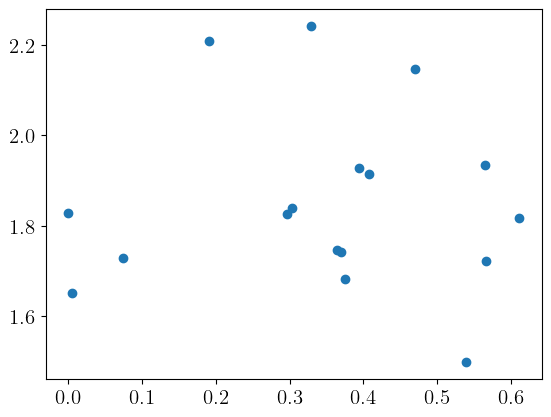

In [111]:
plt.scatter(fourlac_comb_TeV.Voidiness, fourlac_comb_TeV.PL_Index)

In [139]:
popt, pcov = curve_fit(line, fourlac_comb_TeV.Voidiness, fourlac_comb_TeV.Variability_Index)

x = np.linspace(0, 0.7, len(fourlac_comb_TeV))
y = line(x, popt[0], popt[1])

r, _ = pearsonr(fourlac_comb_TeV.Voidiness, fourlac_comb_TeV.Variability_Index)

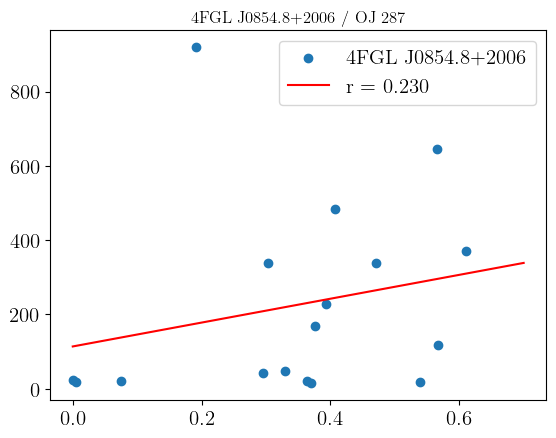

In [140]:
plt.scatter(fourlac_comb_TeV.Voidiness, fourlac_comb_TeV.Variability_Index, label = "4FGL J0854.8+2006")
plt.plot(x,y, c = 'r', label = f'r = {r:.3f}')
plt.title("4FGL J0854.8+2006 / OJ 287")
plt.legend()

In [141]:
popt, pcov = curve_fit(line, fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].Voidiness, fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].PL_Index)

x = np.linspace(0, 0.7, len(fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725]))
y = line(x, popt[0], popt[1])

x1 = np.linspace(0, 0.7, 100)
y1 = line(x1, popt[0], popt[1])
r, _ = pearsonr(fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].Voidiness, fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].PL_Index)

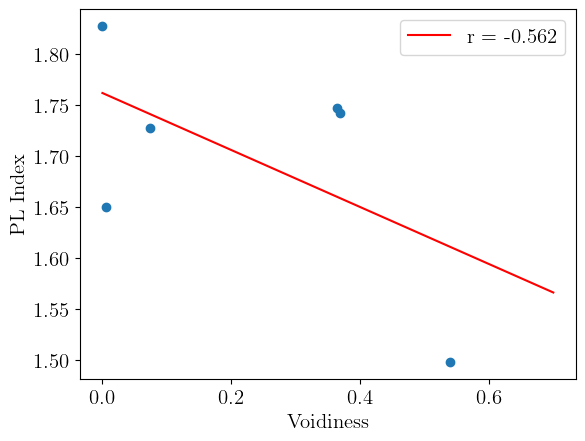

In [142]:
plt.scatter(fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].Voidiness, fourlac_comb_TeV[fourlac_comb_TeV.Variability_Index < 24.725].PL_Index)
plt.plot(x,y, c = 'r', label = f'r = {r:.3f}')
#plt.plot(x1, y1)
plt.xlabel('Voidiness')
plt.ylabel('PL Index')
plt.legend()

In [61]:
fourlac_des = pd.read_excel('exported_dataFrames/4lacdes_bll.xlsx')
fourlac_sutter = pd.read_excel('exported_dataFrames/4lacsutter_bll.xlsx')

fourlac_comb = pd.concat([fourlac_des, fourlac_sutter], ignore_index = True)

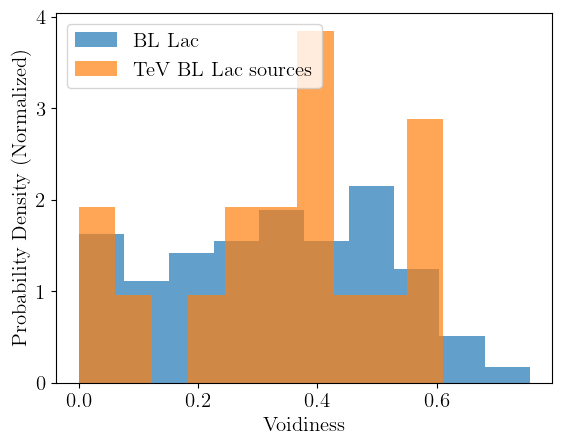

In [67]:
plt.hist(fourlac_comb.Voidiness, density = True, label = "BL Lac", alpha = 0.7)
plt.hist(fourlac_comb_TeV.Voidiness, density = True, label = "TeV BL Lac sources", alpha = 0.7)

plt.xlabel("Voidiness")
plt.ylabel("Probability Density (Normalized)")
plt.legend(loc = 'upper left')

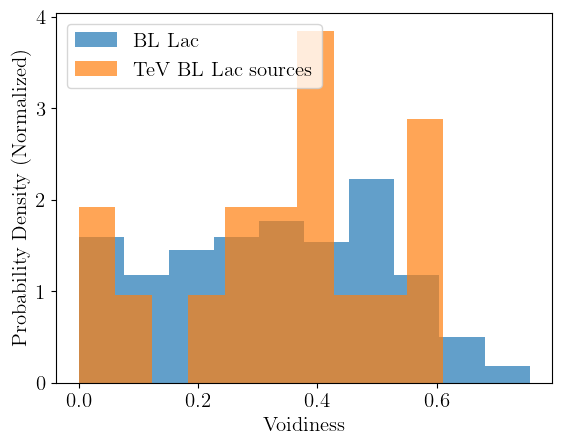

In [83]:
plt.hist(fourlac_comb[fourlac_comb.TeVflag != 1].Voidiness, density = True, label = "BL Lac", alpha = 0.7)
plt.hist(fourlac_comb_TeV.Voidiness, density = True, label = "TeV BL Lac sources", alpha = 0.7)

plt.xlabel("Voidiness")
plt.ylabel("Probability Density (Normalized)")
plt.legend(loc = 'upper left')

In [77]:
fourlac_sutter_total = pd.read_excel('exported_dataFrames/4lacsutter_w_voidiness_dup_drop_above_z0_1.xlsx')

In [79]:
fourlac_sutter_total[fourlac_sutter_total.TeVflag == 1].CLASS

30      b'bll'
35      b'BLL'
83      b'bll'
97      b'bll'
115     b'bll'
162     b'BLL'
164     b'bll'
165     b'bll'
168     b'bll'
169    b'FSRQ'
235     b'bll'
239    b'fsrq'
244     b'BLL'
245     b'bll'
250     b'bll'
283     b'BLL'
Name: CLASS, dtype: object

In [80]:
# 2 FSRQ's in 4lac in sutter footprint, 0 in des footprint

In [84]:
fourlac_des_total = pd.read_excel('exported_dataFrames/4lacdes_w_voidiness_dup_drop_above_z0_1.xlsx')

In [85]:
fourlac_des_total[fourlac_des_total.TeVflag == 1].CLASS

58    b'bll'
68    b'BLL'
83    b'bll'
Name: CLASS, dtype: object